In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        pass

train_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
test_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"
val_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

2024-06-11 12:52:25.670633: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 12:52:25.670799: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 12:52:25.858957: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
import matplotlib.image as mpimg

In [6]:
classes = os.listdir(train_path)

In [7]:
classes

['PNEUMONIA', 'NORMAL']

In [11]:
pneumonia_dir = os.path.join(train_path + "/" + classes[0])
normal_dir = os.path.join(train_path + "/" + classes[1])

In [12]:
pneumonia_img = os.listdir(pneumonia_dir)
normal_img = os.listdir(normal_dir)

print("Length of pneumonia img", len(pneumonia_img))
print("Length of normal img", len(normal_img))

Length of pneumonia img 3875
Length of normal img 1341


In [13]:
print(pneumonia_img[0])

person1180_virus_2010.jpeg


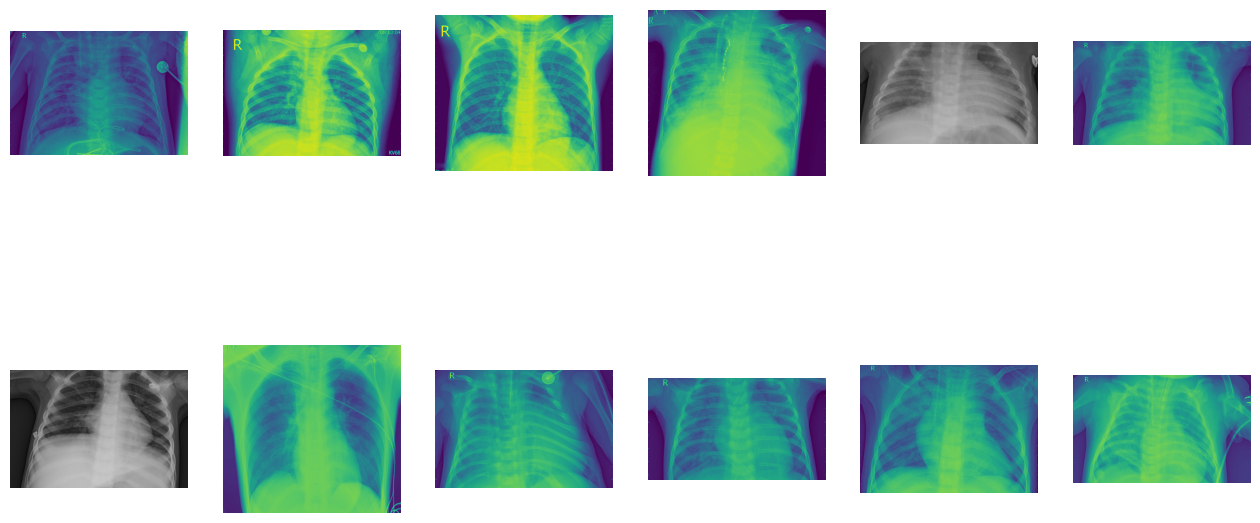

In [32]:

fig = plt.gcf()
fig.set_size_inches(16, 8)
 
pic_index = 12
 
pneumonia_images = [os.path.join(pneumonia_dir, fname)
                    for fname in pneumonia_img[pic_index-12:pic_index]]

for i, img_path in enumerate(pneumonia_images):
    ax = plt.subplot(2, 6, i+1)
    ax.axis('Off')
 
    img = mpimg.imread(img_path)
    plt.imshow(img)
 
plt.show()

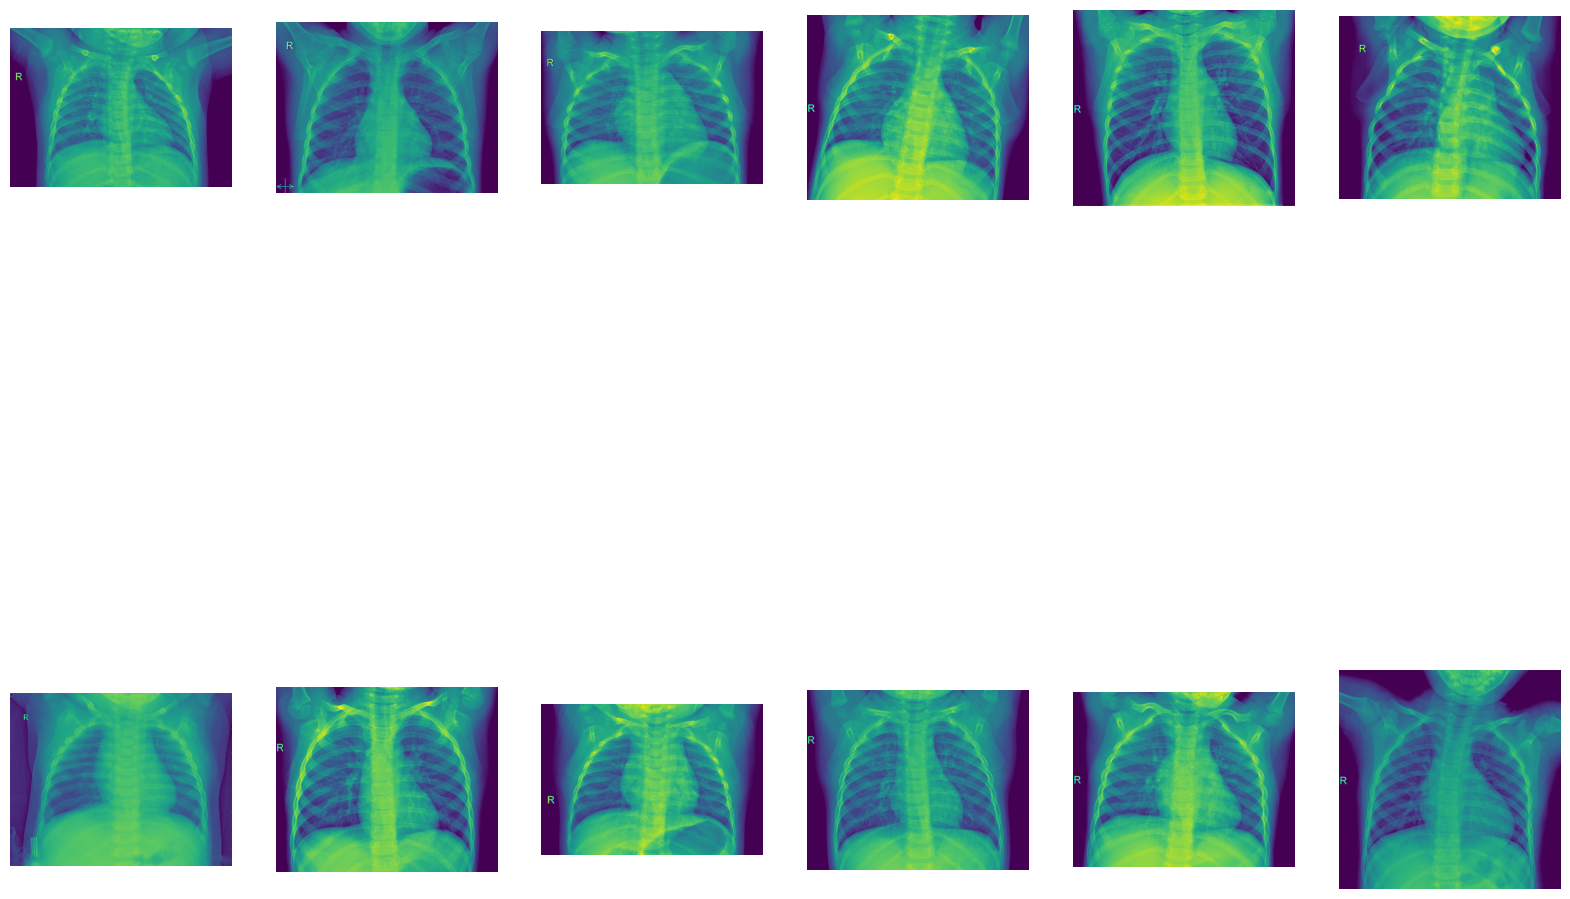

In [33]:
fig = plt.figure(figsize=(20,16))
pic_index = 16

normal_images = [os.path.join(normal_dir, fname) 
                for fname in normal_img[pic_index-12:pic_index]]

for i, img_path in enumerate(normal_images):
    ax = plt.subplot(2,6,i+1)
    ax.axis('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

# Data Preprocessing

In [48]:
train = image_dataset_from_directory(
    directory = train_path,
    labels = 'inferred',
    label_mode="categorical",
    batch_size=32,
    image_size = (224,224)
)
test = image_dataset_from_directory(
    directory = test_path,
    labels = 'inferred',
    label_mode="categorical",
    batch_size=32,
    image_size = (224,224)
)
val = image_dataset_from_directory(
    directory = val_path,
    labels = 'inferred',
    label_mode="categorical",
    batch_size=32,
    image_size = (224,224)
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [49]:
from keras.applications import ResNet50

In [59]:
base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)

predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False


In [60]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, None,      │      1,024 │ conv2_block1_3_c

 Total params: 25,687,938 (97.99 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [61]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [62]:

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [63]:
history = model.fit(train,
          epochs=10,
          validation_data=val)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 484s 3s/step - accuracy: 0.8565 - loss: 0.5155 - val_accuracy: 0.7500 - val_loss: 0.5555
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - accuracy: 0.9726 - loss: 0.0717 - val_accuracy: 0.6250 - val_loss: 0.6841
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - accuracy: 0.9779 - loss: 0.0535 - val_accuracy: 0.6250 - val_loss: 0.8122
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 473s 3s/step - accuracy: 0.9835 - loss: 0.0442 - val_accuracy: 0.6250 - val_loss: 0.8952
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 477s 3s/step - accuracy: 0.9849 - loss: 0.0365 - val_accuracy: 0.8125 - val_loss: 0.5006
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 473s 3s/step - accuracy: 0.9844 - loss: 0.0406 - val_accuracy: 0.8750 - val_loss: 0.4606
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 502s 3s/step - accuracy: 0.9913 - loss: 0.0264 - val_accuracy: 0.6875 - val_loss: 1.1824
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 474s 3s/step - accuracy: 0.9868 - loss: 0.0319 - val_accu

In [64]:
loss, accuracy = model.evaluate(test)
print('The accuracy of the model on test dataset is',
      np.round(accuracy*100))

20/20 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.8783 - loss: 0.4636
The accuracy of the model on test dataset is 86.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Normal


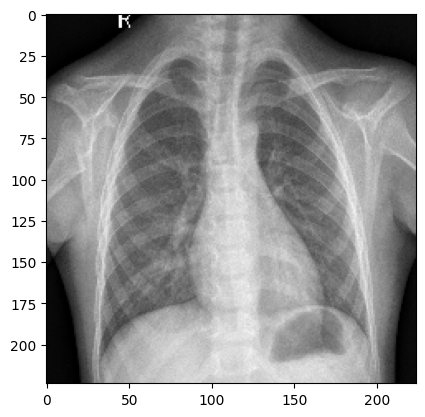

In [67]:
test_image = tf.keras.utils.load_img(
	"/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0010-0001.jpeg",
	target_size=(224, 224))

plt.imshow(test_image)

test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)


class_probabilities = result[0]

if class_probabilities[0] > class_probabilities[1]:
	print("Normal")
else:
	print("Pneumonia")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Pneumonia


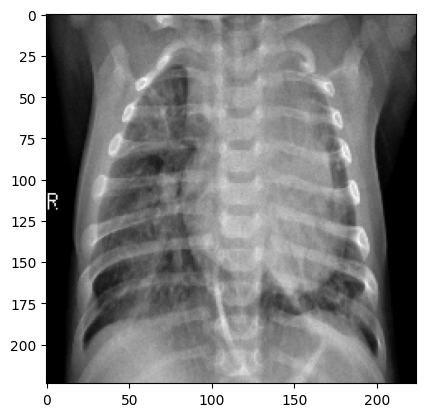

In [68]:
test_image = tf.keras.utils.load_img(
	"/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg",
	target_size=(224, 224))

plt.imshow(test_image)

test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)


class_probabilities = result[0]

if class_probabilities[0] > class_probabilities[1]:
	print("Normal")
else:
	print("Pneumonia")
